## Content Based recommendation system

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [128]:
df = pd.read_csv("D:/Courses/big data/project/Anime/anime.csv")
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [297]:
df.tail()

,anime_id,name,genre,type,bag_of_words
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,hentai,OVA,"hentai, OVA"
12290,5543,Under World,hentai,OVA,"hentai, OVA"
12291,5621,Violence Gekiga David no Hoshi,hentai,OVA,"hentai, OVA"
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,hentai,OVA,"hentai, OVA"
12293,26081,Yasuji no Pornorama: Yacchimae!!,hentai,Movie,"hentai, Movie"


Exploring the data

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
anime_id    12294 non-null int64
name        12294 non-null object
genre       12232 non-null object
type        12269 non-null object
episodes    12294 non-null object
rating      12064 non-null float64
members     12294 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 672.4+ KB


In [134]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

### For Cotent based recommender system we will be using { Name, Genre, Type} column

In [135]:
# preprocessing
# filling NaN "Type" with unknown
df.loc[(df['type'].isnull()), 'type'] = 'Unknown'
# filling NaN "Genre" with unknown
df.loc[(df['genre'].isnull()), 'genre'] = 'Unknown'

In [136]:
df.isnull().sum()

anime_id      0
name          0
genre         0
type          0
episodes      0
rating      230
members       0
dtype: int64

In [7]:
# Removing punctuation
#df['name'] = df['name'].str.replace('[^\w\s]','')
#df['name'].head()

In [137]:
# Dropping unwanted columns
df.drop(['rating', 'members', 'episodes'], axis=1, inplace=True)
df.head()

,anime_id,name,genre,type
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV


In [211]:
# Converting to lower case
df['genre'] = df['genre'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [10]:
# tokenization of keywords
#from textblob import TextBlob
#df['genre'] = df['genre'].apply(lambda x: TextBlob(x).words)
#df['type'] = df['type'].apply(lambda x: TextBlob(x).words)
#df['episodes'] = df['episodes'].apply(lambda x: TextBlob(x).words)
#df.head()

In [213]:
df['bag_of_words'] = ""
df.loc[:,'bag_of_words'] = df.loc[:, 'genre'] +', '+ df.loc[:, 'type']

In [214]:
# Data after preprocessing
df.head()

,anime_id,name,genre,type,bag_of_words
0,32281,Kimi no Na wa.,"drama, romance, school, supernatural",Movie,"drama, romance, school, supernatural, Movie"
1,5114,Fullmetal Alchemist: Brotherhood,"action, adventure, drama, fantasy, magic, mili...",TV,"action, adventure, drama, fantasy, magic, mili..."
2,28977,Gintama°,"action, comedy, historical, parody, samurai, s...",TV,"action, comedy, historical, parody, samurai, s..."
3,9253,Steins;Gate,"sci-fi, thriller",TV,"sci-fi, thriller, TV"
4,9969,Gintama&#039;,"action, comedy, historical, parody, samurai, s...",TV,"action, comedy, historical, parody, samurai, s..."


### Using sklearn TFIDF implementation

In [13]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(df["bag_of_words"])

In [14]:
bag = vectorizer.get_feature_names()

In [15]:
# Using Cosine to obtain similaritier between two animes
cosine_sim = cosine_similarity(tfidf, tfidf)

In [16]:
cosine_sim.shape

(12294, 12294)

In [17]:
# recommender function
def recommendation(name, cosine_sim):
    recommended = np.array([])
    index_ = df.loc[(df['name'] == name)].index
    score = cosine_sim[index_]
    ind = np.argpartition(score[0], -10)[-11:]
    ind = ind[np.argsort(score[0][ind])]
    print(score[0][ind])
    #for i in ind:
     #   recommended = np.append(recommended, df.loc[(df.index == i)]['name'])        
    return ind

In [44]:
# Predicting movies similar to "Fairy Tail"
indices = recommendation('Fairy Tail', cosine_sim)
print(indices)
df[['anime_id','name', 'genre', 'type']].loc[indices]

[0.9394034  0.9394034  0.9394034  0.9394034  0.96155633 0.96155633
 0.96155633 0.96155633 0.96155633 1.         1.        ]
[ 1854   959  3592  2524 10953   290   101   268   795   255   288]


,anime_id,name,genre,type
1854,332,Dokidoki Densetsu: Mahoujin Guru Guru,"adventure, comedy, fantasy, magic, shounen",TV
959,331,Mahoujin Guru Guru,"adventure, comedy, fantasy, magic, shounen",TV
3592,1018,Majutsushi Orphen: Revenge,"adventure, comedy, fantasy, magic, shounen",TV
2524,1164,Mahou Senshi Louie,"adventure, comedy, fantasy, magic, shounen",TV
10953,28833,Chain Chronicle: Haecceitas no Hikari,"action, adventure, fantasy, magic, shounen",TV
290,31741,Magi: Sinbad no Bouken (TV),"action, adventure, fantasy, magic, shounen",TV
101,18115,Magi: The Kingdom of Magic,"action, adventure, fantasy, magic, shounen",TV
268,14513,Magi: The Labyrinth of Magic,"action, adventure, fantasy, magic, shounen",TV
795,8086,Densetsu no Yuusha no Densetsu,"action, adventure, fantasy, magic, shounen",TV
255,22043,Fairy Tail (2014),"action, adventure, comedy, fantasy, magic, sho...",TV


## TF - IDF implementation without library

In [56]:
# Calculating TF
tf = df['bag_of_words'].apply(lambda x: pd.value_counts(x.split(","))).sum(axis = 0).reset_index()
tf.columns = ['words','tf']

# removing duplicate words
for i,word1 in enumerate(tf['words']):
    tf.loc[i, 'words']= word1.strip()
tf2 = {}
for i,word1 in enumerate(tf['words']):
    if word1 not in tf2.keys():
        tf2[word1] = tf.loc[i, 'tf']
    else:
        tf2[word1] += tf.loc[i, 'tf']
tf = pd.DataFrame.from_dict(tf2, orient='index').reset_index()
tf.columns = ['words','tf']
tf.head()

,words,tf
0,supernatural,1037.0
1,drama,2016.0
2,Movie,2348.0
3,school,1220.0
4,romance,1464.0


In [47]:
# Calculating IDF
N = df.shape[0]
idf = {}
for i,word in enumerate(tf['words']):
    tf.loc[i, 'idf'] = np.log(N/(len(df[df['bag_of_words'].str.contains(word)])))
    idf[word] = np.log(N/(len(df[df['bag_of_words'].str.contains(word)])))


In [48]:
# Creating tfidf vectors
tff = pd.DataFrame(columns=tf['words'])
for i in range(N):
    dict_ = dict.fromkeys(tf['words'], 0)
    for word in df['bag_of_words'][i].split(", "):
        dict_[word] = (1/len(df['bag_of_words'][i].split(", "))) * idf[word]
    tff = tff.append(dict_, ignore_index=True)
tff.head()

words,supernatural,drama,Movie,school,romance,military,magic,adventure,TV,action,...,Music,cars,ONA,kids,shoujo ai,unknown,Unknown,hentai,yaoi,yuri
0,0.494556,0.361599,0.331109,0.462052,0.425588,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.225999,0.000000,0.000000,0.000000,0.420303,0.345018,0.206943,0.147192,0.182944,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.147192,0.182944,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.392512,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.147192,0.182944,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
cosine_sim_ = cosine_similarity(tff, tff)

### Comparing both with and without library tfidf implementation and recommending on the basis of contents

In [51]:
# Predicting movies similar to "Fairy Tail"
indices = recommendation('Fairy Tail', cosine_sim_)
print(indices)
df[['anime_id','name', 'genre', 'type']].loc[indices]

[0.94857288 0.94857288 0.94857288 0.94857288 0.97758854 0.97758854
 0.97758854 0.97758854 0.97758854 1.         1.        ]
[ 2524  1854  3592   959   101   268   795 10953   290   288   255]


,anime_id,name,genre,type
2524,1164,Mahou Senshi Louie,"adventure, comedy, fantasy, magic, shounen",TV
1854,332,Dokidoki Densetsu: Mahoujin Guru Guru,"adventure, comedy, fantasy, magic, shounen",TV
3592,1018,Majutsushi Orphen: Revenge,"adventure, comedy, fantasy, magic, shounen",TV
959,331,Mahoujin Guru Guru,"adventure, comedy, fantasy, magic, shounen",TV
101,18115,Magi: The Kingdom of Magic,"action, adventure, fantasy, magic, shounen",TV
268,14513,Magi: The Labyrinth of Magic,"action, adventure, fantasy, magic, shounen",TV
795,8086,Densetsu no Yuusha no Densetsu,"action, adventure, fantasy, magic, shounen",TV
10953,28833,Chain Chronicle: Haecceitas no Hikari,"action, adventure, fantasy, magic, shounen",TV
290,31741,Magi: Sinbad no Bouken (TV),"action, adventure, fantasy, magic, shounen",TV
288,6702,Fairy Tail,"action, adventure, comedy, fantasy, magic, sho...",TV


## Creating user profile and recommending movies 

In [200]:
user_ratings = pd.read_csv("D:/Courses/big data/project/Anime/rating.csv")

In [201]:
user_ratings.groupby(user_ratings["rating"]).count()

,user_id,anime_id
rating,,
-1,1476496,1476496
1,16649,16649
2,23150,23150
3,41453,41453
4,104291,104291
5,282806,282806
6,637775,637775
7,1375287,1375287
8,1646019,1646019


In [202]:
# dropping missing ratings
user_ratings.drop(user_ratings[user_ratings['rating']==-1].index, axis=0, inplace=True)
user_ratings.groupby(user_ratings["rating"]).count()

,user_id,anime_id
rating,,
1,16649,16649
2,23150,23150
3,41453,41453
4,104291,104291
5,282806,282806
6,637775,637775
7,1375287,1375287
8,1646019,1646019
9,1254096,1254096


Text(0, 0.5, 'Frequency')

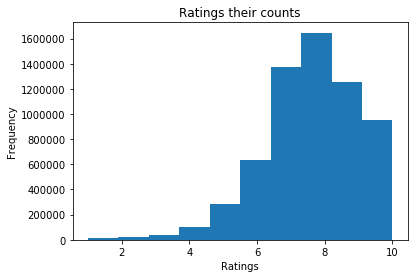

In [203]:
# create figure and axis
fig, ax = plt.subplots()
ax.hist(user_ratings['rating'])
ax.set_title('Ratings their counts')
ax.set_xlabel('Ratings')
ax.set_ylabel('Frequency')

In [279]:
# selecting a random user
import random
def get_random_user():
    # random.seed(123)
    user = random.randint(1, max(user_ratings['user_id']))    
    print("User selected for predictions UserId:", (user))
    return user

In [282]:
def create_user_profile(user):
    data = user_ratings.loc[user_ratings['user_id']==user]
    
    # shifting the rating with center at zero
    mean = data.mean()['rating']
    data['likeness'] = 0
    data.loc[:, "likeness"] = data.loc[:, "rating"] - mean
    
    # creating user table for all the movies rated by him/her
    #user_prof = pd.DataFrame(columns=bag)
    user_prof = pd.DataFrame(columns=tf['words'])
    for id in data['anime_id']:
        dict_ = dict.fromkeys(tf['words'], 0)
        for word in df.loc[df['anime_id']==id]['bag_of_words'].values[0].split(', '):
            #if word in tf['words']:
                #dict_[word] = tf.loc[(tf.words == word)]['tfidf'][tf.loc[(tf.words == word), 'tfidf'].index[0]]
            dict_[word] = (1/len(df.loc[df['anime_id']==id]['bag_of_words'].values[0].split(', '))) * idf[word]
        #print(dict_)    
        user_prof = user_prof.append(dict_, ignore_index=True)
    # Creating user prfile by doing weighted sum of the attributes he/she has rated
    user_profile = []
    for col in user_prof.columns:
        user_profile.append(user_prof[col] @ data['likeness'].values)
    return user_profile, data

In [284]:
def evaluation_metrics(cosine_sim_, data):
    predicted_likeness = {}
    for x in data["anime_id"]:
        predicted_likeness[x] = cosine_sim_[0][df.loc[df['anime_id']==x].index[0]]
    true_pos = 0
    true_neg = 0
    false_pos = 0
    false_neg = 0
    for x in predicted_likeness.keys():
        predic = predicted_likeness[x]
        actual = data.loc[data["anime_id"]==x, 'likeness'].values[0]
        if predic >= 0 and actual >= 0:
            true_pos += 1
        elif predic >= 0 and actual < 0:
            false_pos += 1
        elif predic < 0 and actual >= 0:
            false_neg += 1
        else:
            true_neg += 1
    print("true_pos : "+ str(true_pos) +"\ntrue_neg : "+str(true_neg)+"\nfalse_pos : "+ str(false_pos) +"\nfalse_neg : "+ str(false_neg) +"\n")
    precision = true_pos/(true_pos + false_pos)
    recall = true_pos/(true_pos + false_neg)
    accuracy = (true_pos + true_neg)/(true_pos + false_neg + true_neg + false_pos)
    print("Precision : "+str(precision*100) + "\nRecall : "+str(recall*100)+"\nAccuracy : "+str(accuracy*100))

In [288]:
# recommender function
def recommendation_with_user_profile(user):
    cosine_sim_user = cosine_similarity(user, tff)
    ind = np.argpartition(cosine_sim_user[0], -10)[-10:]
    ind = ind[np.argsort(cosine_sim_user[0][ind])]    
    return ind, cosine_sim_user

In [295]:
#user = get_random_user()
user = 59325
user_profile, data = create_user_profile(user)
# Reshaping the array
user_prof = np.asarray(user_profile)
user_prof = user_prof.reshape(-1, 51)
index, cosine_sim_user = recommendation_with_user_profile(user_prof)
print("Recommending movies for user "+ str(user))
df[['anime_id', 'name', 'genre', 'type']].loc[index]

C:\Users\arsal\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\arsal\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Recommending movies for user 59325


,anime_id,name,genre,type
335,12189,Hyouka,"mystery, school, slice of life",TV
3076,4202,Mokke Specials,"mystery, slice of life, supernatural",Special
4392,31636,Dagashi Kashi,"comedy, shounen, slice of life",TV
1707,32648,Handa-kun,"comedy, shounen, slice of life",TV
9813,25139,Oh! My Konbu,"comedy, shounen, slice of life",TV
1239,10378,Shinryaku!? Ika Musume,"comedy, shounen, slice of life",TV
1297,8557,Shinryaku! Ika Musume,"comedy, shounen, slice of life",TV
1431,13267,Shinryaku!! Ika Musume,"comedy, shounen, slice of life",OVA
1664,27969,Hana to Alice: Satsujin Jiken,"drama, mystery, slice of life",Movie
2684,2931,Mokke,"mystery, slice of life, supernatural",TV


In [296]:
evaluation_metrics(cosine_sim_user, data)

true_pos : 247
true_neg : 145
false_pos : 65
false_neg : 217

Precision : 79.16666666666666
Recall : 53.23275862068966
Accuracy : 58.160237388724035


In [298]:
df2 = pd.read_csv("D:/Courses/big data/project/Anime/rating.csv")

In [300]:
df2.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01
